# Applied A.I. Solutions Development : Machine Learning 1
## Term Project : "Airline Pessenger Satisfaction Prediction" - Group 4

#### Dataset - https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction?select=train.csv

In [1]:
#import necessary libraries and Modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
%matplotlib inline

In [38]:
#Load dataset into pandas dataframe

df = pd.read_csv("./train.csv")
df.drop(["Unnamed: 0","id"], axis = 1, inplace =True)
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [39]:
#Check null values
data=df.copy()
data.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [40]:
#Imputing null values
data["Arrival Delay in Minutes"] = data["Arrival Delay in Minutes"].fillna(data["Arrival Delay in Minutes"].median())

### EDA

In [41]:
#Generate key statistics for numeric columns
data.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.133392
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.649776
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [42]:
#Features data type information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  object 
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [43]:
# Check values of categorical features
cat_columns = ["Gender", "Customer Type", "Type of Travel", "Class"]
for col in cat_columns:
    print("Categorical values in {} :".format(col),data[col].unique())

Categorical values in Gender : ['Male' 'Female']
Categorical values in Customer Type : ['Loyal Customer' 'disloyal Customer']
Categorical values in Type of Travel : ['Personal Travel' 'Business travel']
Categorical values in Class : ['Eco Plus' 'Business' 'Eco']


In [44]:
#Convert categorial features into numeric one
data["Gender"].replace({"Male":0, "Female":1}, inplace=True)
data["Customer Type"].replace({"Loyal Customer":0, "disloyal Customer":1}, inplace=True)
data["Type of Travel"].replace({"Personal Travel":0, "Business travel":1}, inplace=True)
data["Class"].replace({"Eco":0, "Eco Plus":1, "Business":2}, inplace=True)

In [45]:
#Check unique values in all columns
data.nunique()

Gender                                  2
Customer Type                           2
Age                                    75
Type of Travel                          2
Class                                   3
Flight Distance                      3802
Inflight wifi service                   6
Departure/Arrival time convenient       6
Ease of Online booking                  6
Gate location                           6
Food and drink                          6
Online boarding                         6
Seat comfort                            6
Inflight entertainment                  6
On-board service                        6
Leg room service                        6
Baggage handling                        5
Checkin service                         6
Inflight service                        6
Cleanliness                             6
Departure Delay in Minutes            446
Arrival Delay in Minutes              455
satisfaction                            2
dtype: int64

<AxesSubplot:>

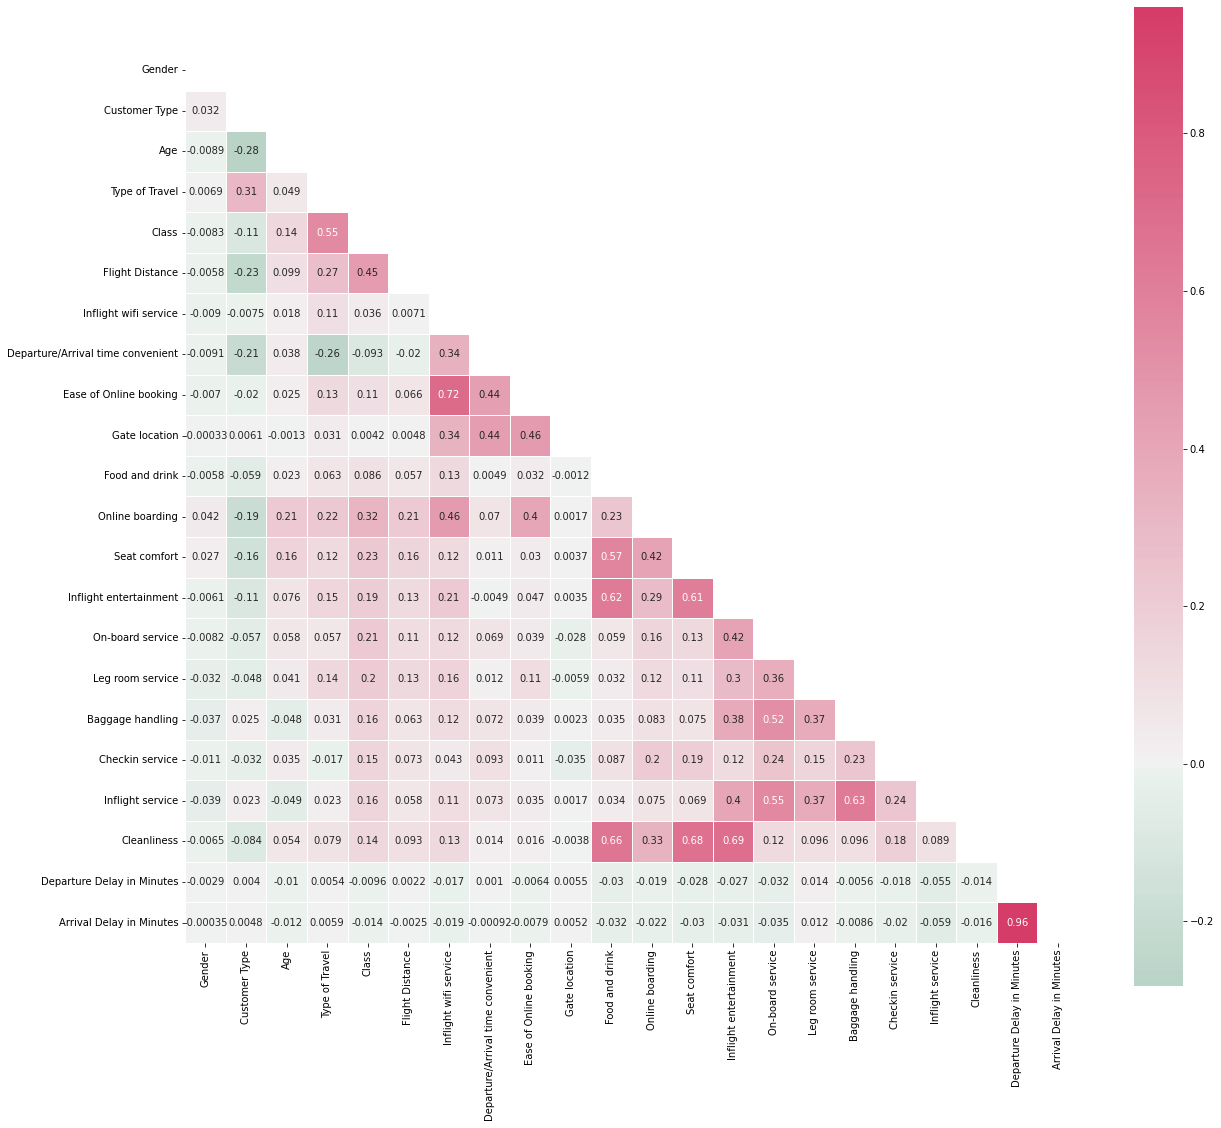

In [46]:
#Heat map of correlations between features
corr=data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(150, 1, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

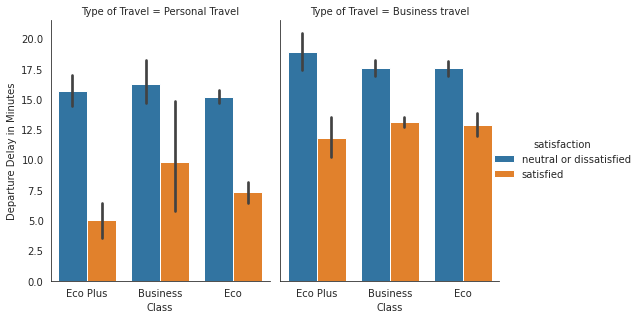

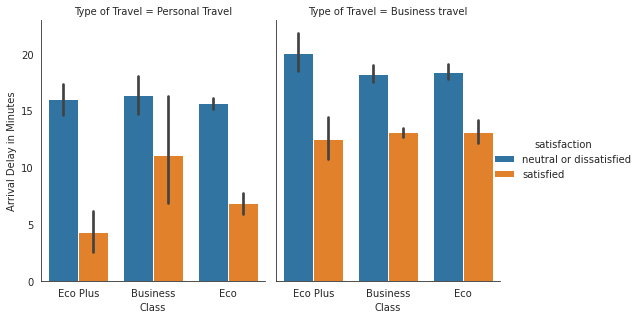

In [47]:
with sns.axes_style('white'):
    g = sns.catplot(x="Class", y="Departure Delay in Minutes", hue="satisfaction", col="Type of Travel", data=df, kind="bar", height=4.5, aspect=.8)
    g = sns.catplot(x="Class", y="Arrival Delay in Minutes", hue="satisfaction", col="Type of Travel", data=df, kind="bar", height=4.5, aspect=.8)

Departure Delay, Arrival Delay grouped by Type of Travel: For personal travel (specially Eco Plus and Eco), the no. of dissatisfied passengers are really high when arrival delay in minutes is high. Now, this is quite obvious. By minute comparison, all combinations have higher no. of dissatisfied passengers compared to no. of satisfied passengers.

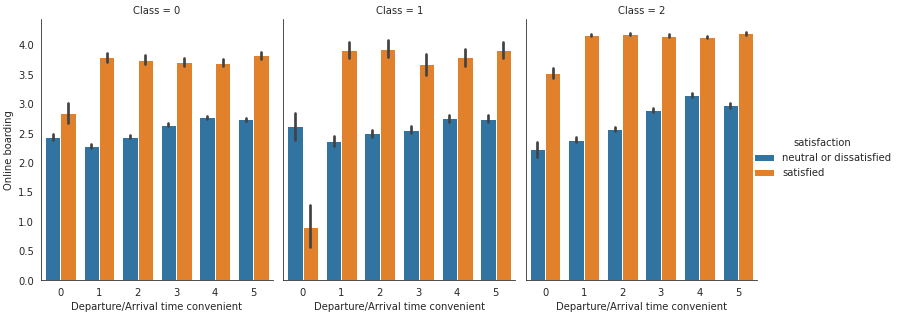

In [48]:
with sns.axes_style('white'):
    g = sns.catplot(x="Departure/Arrival time convenient", y="Online boarding", hue="satisfaction", col="Class", data=data, kind="bar", height=4.5, aspect=.8)

Online Boarding, Departure/Arrival Time Convenience grouped by Class: For Eco Plus class, very inconvenient Departure/Arrival time (Departure/Arrival_time_convenient = 0) has really high no. of dissatisfied passengers, even when online boarding is done very well. For other combinations, no. of satisfied passengers are on the higher side compared to no. of dissatisfied passengers.

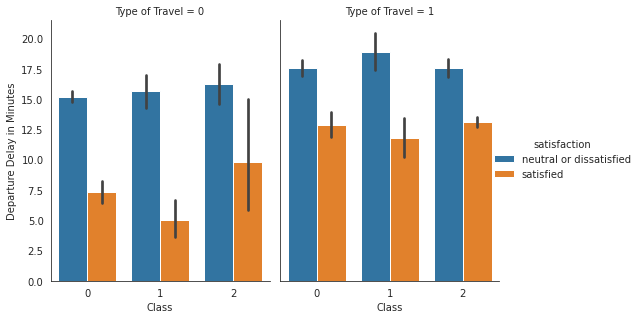

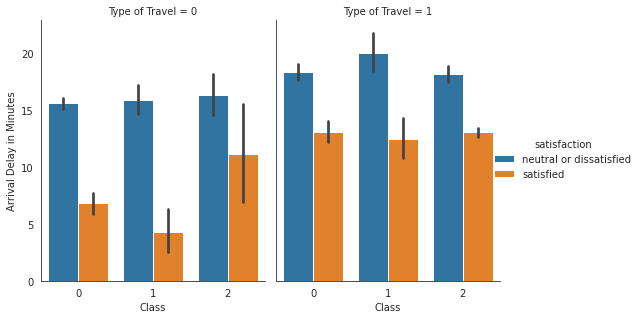

In [49]:
with sns.axes_style('white'):
    g = sns.catplot(x="Class", y="Departure Delay in Minutes", hue="satisfaction", col="Type of Travel", data=data, kind="bar", height=4.5, aspect=.8)
    g = sns.catplot(x="Class", y="Arrival Delay in Minutes", hue="satisfaction", col="Type of Travel", data=data, kind="bar", height=4.5, aspect=.8)

Departure Delay, Arrival Delay grouped by Type of Travel: For personal travel (specially Eco Plus and Eco), the no. of dissatisfied passengers are really high when arrival delay in minutes is high. Now, this is quite obvious. By minute comparison, all combinations have higher no. of dissatisfied passengers compared to no. of satisfied passengers.

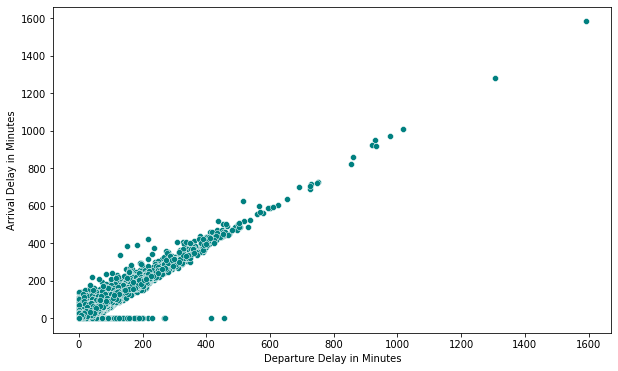

In [50]:
plt.figure(figsize = (10, 6))
sns.scatterplot(x = 'Departure Delay in Minutes', y = 'Arrival Delay in Minutes', data = data, color = 'teal')
plt.show()

Departure Delay and Arrival delay are heavily correlated with each other, therefore one of them should be dropped

In [51]:
data.drop(columns=['Arrival Delay in Minutes'], inplace=True)
# df['Arrival_Delay_in_Minutes'] = df['Arrival_Delay_in_Minutes'].fillna(df['Arrival_Delay_in_Minutes'].mean())

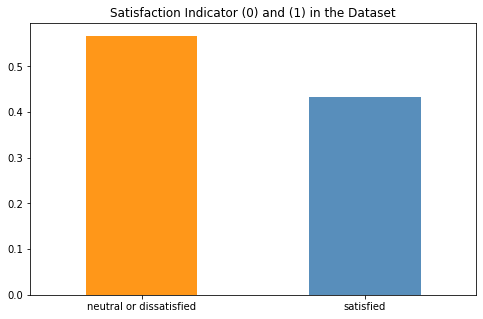

In [52]:
##checking if the dataset is balanced or not?
fig = plt.figure(figsize = (8,5))
data.satisfaction.value_counts(normalize = True).plot(kind='bar', color= ['darkorange','steelblue'], alpha = 0.9, rot=0)
plt.title('Satisfaction Indicator (0) and (1) in the Dataset')
plt.show()

The above plot shows a distribution of around 55%:45% between neutral/dissatisfied passengers and satisfied passengers respectively. So the data is quite balanced and it does not require any special treatment/resampling.

Feature Selection

In [53]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

x = data.drop(["satisfaction"], axis = 1)
y = data["satisfaction"]
selector = SelectKBest(chi2, k=13)
selector.fit(x, y)
#X_new = selector.transform(x)
X_new = x.columns[selector.get_support(indices=True)]
X_new = x[X_new]
# print(x.columns[selector.get_support(indices=True)])
print(X_new)

        Customer Type  Age  Type of Travel  Class  Flight Distance  \
0                   0   13               0      1              460   
1                   1   25               1      2              235   
2                   0   26               1      2             1142   
3                   0   25               1      2              562   
4                   0   61               1      2              214   
...               ...  ...             ...    ...              ...   
103899              1   23               1      0              192   
103900              0   49               1      2             2347   
103901              1   30               1      2             1995   
103902              1   22               1      0             1000   
103903              0   27               1      2             1723   

        Inflight wifi service  Online boarding  Seat comfort  \
0                           3                3             5   
1                           3  

In [54]:
#Define features x and label y
x = X_new
y= data["satisfaction"]

In [55]:
#Split the data into train data and test data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, stratify=y, test_size = 0.2, random_state =101)

#Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler2 = MinMaxScaler()
x_train = scaler2.fit_transform(x_train)
x_test = scaler2.transform(x_test)

### ROC Curve

In [20]:
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn import preprocessing

#Define function to plot ROC curve and AUC value
def roc_curve(y_true, y_pred):
    Forecast1=pd.DataFrame(y_pred)
    Outcome1=pd.DataFrame(y_test)
    lb1 = preprocessing.LabelBinarizer()
    OutcomeB1 =lb1.fit_transform(Outcome1)
    ForecastB1 = lb1.fit_transform(Forecast1)
    fpr, tpr, threshold = metrics.roc_curve(OutcomeB1, ForecastB1)
    roc_auc = metrics.auc(fpr, tpr)
    print('\n ROC Curve')
    #Plot the ROC Curve
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

### Logistics Regression

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

lr_model = LogisticRegression(random_state = 101)
lr_model.fit(x_train, y_train)
lr_pred = lr_model.predict(x_test)
print("Classification report of Logistics Regression Model: \n", classification_report(y_test, lr_pred))

Classification report of Logistics Regression Model: 
                          precision    recall  f1-score   support

neutral or dissatisfied       0.87      0.89      0.88     11776
              satisfied       0.86      0.83      0.84      9005

               accuracy                           0.87     20781
              macro avg       0.86      0.86      0.86     20781
           weighted avg       0.87      0.87      0.87     20781



In [22]:
def optimized_lr(x_train, y_train, x_test, y_test):
    lr_model = LogisticRegression(random_state = 101)
    lr_params = {"solver":["lbfgs","sag","saga", "newton-cg"], "max_iter":[30,50,70,100]}
    lr_grid = GridSearchCV(lr_model, lr_params, scoring ="recall_weighted")
    lr_grid.fit(x_train, y_train)
    lr_grid_pred = lr_grid.predict(x_test)
    global olr_class_report
    olr_class_report = classification_report(y_test, lr_grid_pred)
    print("Classification report of Optimized Logistics Regression Model: \n", olr_class_report)
    print(lr_grid.best_params_)
    return roc_curve(y_test, lr_grid_pred)

C:\Users\darsh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\darsh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Classification report of Optimized Logistics Regression Model: 
                          precision    recall  f1-score   support

neutral or dissatisfied       0.87      0.90      0.88     11776
              satisfied       0.86      0.83      0.84      9005

               accuracy                           0.87     20781
              macro avg       0.86      0.86      0.86     20781
           weighted avg       0.87      0.87      0.87     20781

{'max_iter': 30, 'solver': 'lbfgs'}

 ROC Curve


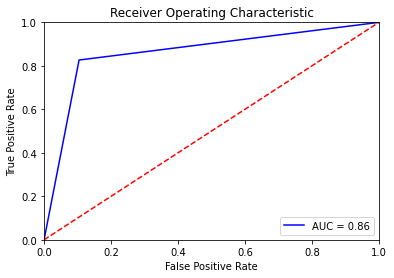

None


In [23]:
print(optimized_lr(x_train, y_train, x_test, y_test))

### Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state = 101)
dt_model.fit(x_train, y_train)
dt_pred = dt_model.predict(x_test)
print("Classification report of Decision Tree Classifier Model: \n", classification_report(y_test, dt_pred))

Classification report of Decision Tree Classifier Model: 
                          precision    recall  f1-score   support

neutral or dissatisfied       0.94      0.94      0.94     11776
              satisfied       0.92      0.92      0.92      9005

               accuracy                           0.93     20781
              macro avg       0.93      0.93      0.93     20781
           weighted avg       0.93      0.93      0.93     20781



In [25]:
def optimized_dt(x_train, y_train, x_test, y_test):
    dt_model = DecisionTreeClassifier(random_state = 101)
    dt_params = {"criterion":["gini","entropy"], "max_features":["sqrt","log2", "auto",1,5,10], "splitter":["best", "random"]}
    dt_grid = GridSearchCV(dt_model, dt_params, scoring = "accuracy")
    dt_grid.fit(x_train, y_train)
    dt_grid_pred = dt_grid.predict(x_test)
    global odt_class_report
    odt_class_report = classification_report(y_test, dt_grid_pred)
    print("Classification report of Optimized Decision Tree Classifier: \n", odt_class_report)
    print(dt_grid.best_params_)
    return roc_curve(y_test, dt_grid_pred)

Classification report of Optimized Decision Tree Classifier: 
                          precision    recall  f1-score   support

neutral or dissatisfied       0.94      0.94      0.94     11776
              satisfied       0.92      0.92      0.92      9005

               accuracy                           0.93     20781
              macro avg       0.93      0.93      0.93     20781
           weighted avg       0.93      0.93      0.93     20781

{'criterion': 'entropy', 'max_features': 10, 'splitter': 'best'}

 ROC Curve


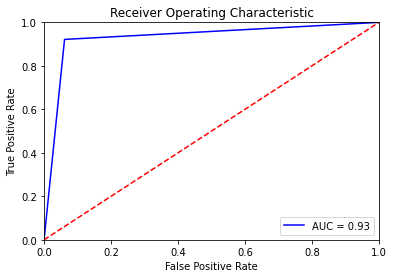

None


In [26]:
print(optimized_dt(x_train, y_train, x_test, y_test))

### Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(random_state = 101, n_jobs=-1)
rfc_model.fit(x_train, y_train)
rfc_pred = rfc_model.predict(x_test)
print("Classification report of Random Forest Classifier: \n", classification_report(y_test, rfc_pred))

Classification report of Random Forest Classifier: 
                          precision    recall  f1-score   support

neutral or dissatisfied       0.95      0.97      0.96     11776
              satisfied       0.96      0.93      0.94      9005

               accuracy                           0.95     20781
              macro avg       0.95      0.95      0.95     20781
           weighted avg       0.95      0.95      0.95     20781



In [28]:
def optimized_rfc(x_train, y_train, x_test, y_test):
    rfc_model = RandomForestClassifier(random_state = 101, n_jobs=-1)
    rfc_params = {"n_estimators":[50,100,150,200], "criterion":["gini","entropy"], "max_features":["sqrt", "log2", 5, 10,13]}
    rfc_grid = GridSearchCV(rfc_model, rfc_params, scoring = "accuracy")
    rfc_grid.fit(x_train, y_train)
    rfc_grid_pred = rfc_grid.predict(x_test)
    global orf_class_report
    orf_class_report = classification_report(y_test, rfc_grid_pred)
    print("Classification report of Optimized Random Forest Classifier: \n", orf_class_report)
    print(rfc_grid.best_params_)
    return roc_curve(y_test, rfc_grid_pred)

Classification report of Optimized Random Forest Classifier: 
                          precision    recall  f1-score   support

neutral or dissatisfied       0.95      0.97      0.96     11776
              satisfied       0.96      0.93      0.94      9005

               accuracy                           0.95     20781
              macro avg       0.95      0.95      0.95     20781
           weighted avg       0.95      0.95      0.95     20781

{'criterion': 'entropy', 'max_features': 5, 'n_estimators': 100}

 ROC Curve


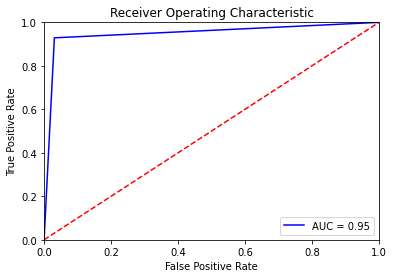

None


In [29]:
print(optimized_rfc(x_train, y_train, x_test, y_test))

### SGD

In [30]:
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier(random_state = 101, n_jobs=-1)
sgd_model.fit(x_train, y_train)
sgd_pred = sgd_model.predict(x_test)
print("Classification report of SGD Classifier: \n", classification_report(y_test, sgd_pred))

Classification report of SGD Classifier: 
                          precision    recall  f1-score   support

neutral or dissatisfied       0.87      0.90      0.88     11776
              satisfied       0.86      0.82      0.84      9005

               accuracy                           0.87     20781
              macro avg       0.87      0.86      0.86     20781
           weighted avg       0.87      0.87      0.87     20781



In [31]:
def optimized_sgd(x_train, y_train, x_test, y_test):
    sgd_model = SGDClassifier(random_state = 101, n_jobs=-1)
    sgd_params = {"loss":["hinge", "log_loss", "squared_error", "squared_hinge", "modified_huber"], "penalty":["l2","l1"]}
    sgd_grid = GridSearchCV(sgd_model, sgd_params, scoring = "accuracy")
    sgd_grid.fit(x_train, y_train)
    sgd_grid_pred = sgd_grid.predict(x_test)
    global sgd_class_report
    sgd_class_report = classification_report(y_test, sgd_grid_pred)
    print("Classification report of Optimized SGD Classifier: \n", sgd_class_report)
    print(sgd_grid.best_params_)
    return roc_curve(y_test, sgd_grid_pred)

C:\Users\darsh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\darsh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\darsh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 883, in fit
    return self._fit(
  File "C:\Users\darsh\AppData\Local\Programs\Python\Python310\lib\site-packages\sk

Classification report of Optimized SGD Classifier: 
                          precision    recall  f1-score   support

neutral or dissatisfied       0.87      0.90      0.88     11776
              satisfied       0.86      0.82      0.84      9005

               accuracy                           0.87     20781
              macro avg       0.87      0.86      0.86     20781
           weighted avg       0.87      0.87      0.87     20781

{'loss': 'hinge', 'penalty': 'l2'}

 ROC Curve


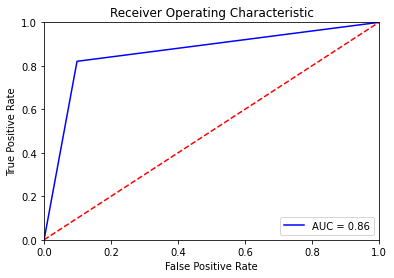

None


In [32]:
print(optimized_sgd(x_train, y_train, x_test, y_test))

### Support Vector Machine

In [33]:
from sklearn.svm import SVC

svm_model = SVC(random_state =101)
svm_model.fit(x_train, y_train)
svm_pred = svm_model.predict(x_test)
print("Classification report of Support Vector Classifier: \n", classification_report(y_test, svm_pred))

Classification report of Support Vector Classifier: 
                          precision    recall  f1-score   support

neutral or dissatisfied       0.94      0.96      0.95     11776
              satisfied       0.94      0.92      0.93      9005

               accuracy                           0.94     20781
              macro avg       0.94      0.94      0.94     20781
           weighted avg       0.94      0.94      0.94     20781



In [34]:
def optimized_svm(x_train, y_train, x_test, y_test):
    svm_model = SVC(random_state =101)
    svm_params = {"kernel":["linear", "poly", "rbf"], "gamma":["scale","auto"]}
    svm_grid = GridSearchCV(svm_model, svm_params, scoring = "accuracy")
    svm_grid.fit(x_train, y_train)
    svm_grid_pred = svm_grid.predict(x_test)
    global osvm_class_report
    osvm_class_report = classification_report(y_test, svm_grid_pred)
    print("Classification report of Optimized Support Vector Classifier: \n", osvm_class_report)
    print(svm_grid.best_params_)
    return roc_curve(y_test, svm_grid_pred)

Classification report of Optimized Support Vector Classifier: 
                          precision    recall  f1-score   support

neutral or dissatisfied       0.94      0.96      0.95     11776
              satisfied       0.94      0.92      0.93      9005

               accuracy                           0.94     20781
              macro avg       0.94      0.94      0.94     20781
           weighted avg       0.94      0.94      0.94     20781

{'gamma': 'scale', 'kernel': 'rbf'}

 ROC Curve


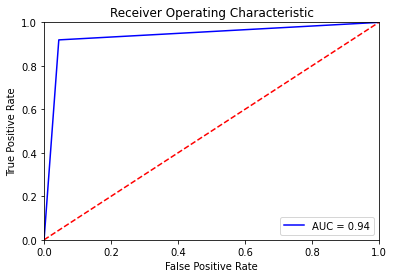

None


In [35]:
print(optimized_svm(x_train, y_train, x_test, y_test))

Lets drop some features depending on their chi score rankings to see if the accuracies of the models increases further increase, since the features are already selected by chi2, let drop them at random. 

Classification report before dropping the column ['On-board service', 'Seat comfort', 'Inflight entertainment', 'Flight Distance']
                         precision    recall  f1-score   support

neutral or dissatisfied       0.87      0.89      0.88     11776
              satisfied       0.85      0.83      0.84      9005

               accuracy                           0.86     20781
              macro avg       0.86      0.86      0.86     20781
           weighted avg       0.86      0.86      0.86     20781

Classification report after dropping the column ['On-board service', 'Seat comfort', 'Inflight entertainment', 'Flight Distance']


C:\Users\darsh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\darsh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Classification report of Optimized Logistics Regression Model: 
                          precision    recall  f1-score   support

neutral or dissatisfied       0.87      0.88      0.88     11776
              satisfied       0.84      0.82      0.83      9005

               accuracy                           0.86     20781
              macro avg       0.86      0.85      0.86     20781
           weighted avg       0.86      0.86      0.86     20781

{'max_iter': 30, 'solver': 'sag'}

 ROC Curve


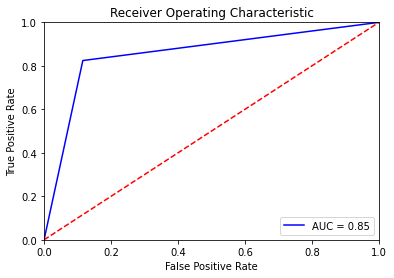

None
----------------------------------------------------------------------------------------------------
Classification report before dropping the column ['On-board service', 'Seat comfort', 'Inflight entertainment', 'Flight Distance']
                         precision    recall  f1-score   support

neutral or dissatisfied       0.93      0.93      0.93     11776
              satisfied       0.91      0.91      0.91      9005

               accuracy                           0.92     20781
              macro avg       0.92      0.92      0.92     20781
           weighted avg       0.92      0.92      0.92     20781

Classification report after dropping the column ['On-board service', 'Seat comfort', 'Inflight entertainment', 'Flight Distance']


C:\Users\darsh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\darsh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\darsh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\darsh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py",

Classification report of Optimized Decision Tree Classifier: 
                          precision    recall  f1-score   support

neutral or dissatisfied       0.93      0.93      0.93     11776
              satisfied       0.91      0.91      0.91      9005

               accuracy                           0.92     20781
              macro avg       0.92      0.92      0.92     20781
           weighted avg       0.92      0.92      0.92     20781

{'criterion': 'entropy', 'max_features': 5, 'splitter': 'best'}

 ROC Curve


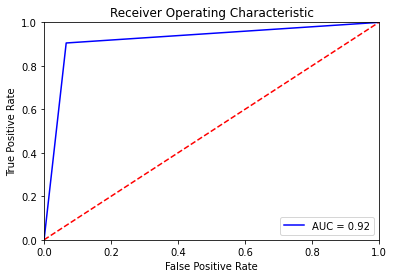

None
----------------------------------------------------------------------------------------------------
Classification report before dropping the column ['On-board service', 'Seat comfort', 'Inflight entertainment', 'Flight Distance']
                         precision    recall  f1-score   support

neutral or dissatisfied       0.94      0.96      0.95     11776
              satisfied       0.95      0.92      0.93      9005

               accuracy                           0.94     20781
              macro avg       0.94      0.94      0.94     20781
           weighted avg       0.94      0.94      0.94     20781

Classification report after dropping the column ['On-board service', 'Seat comfort', 'Inflight entertainment', 'Flight Distance']


C:\Users\darsh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
joblib.externals.loky.process_executor._RemoteTraceback: 
"""
Traceback (most recent call last):
  File "C:\Users\darsh\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\process_executor.py", line 436, in _process_worker
    r = call_item()
  File "C:\Users\darsh\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\process_executor.py", line 288, in __call__
    return self.fn(*self.args, **self.kwargs)
  File "C:\Users\dar

Classification report of Optimized Random Forest Classifier: 
                          precision    recall  f1-score   support

neutral or dissatisfied       0.94      0.95      0.94     11776
              satisfied       0.93      0.92      0.92      9005

               accuracy                           0.93     20781
              macro avg       0.93      0.93      0.93     20781
           weighted avg       0.93      0.93      0.93     20781

{'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 100}

 ROC Curve


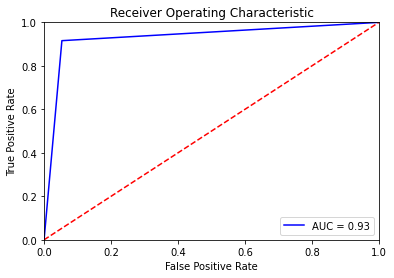

None
----------------------------------------------------------------------------------------------------
Classification report before dropping the column ['On-board service', 'Seat comfort', 'Inflight entertainment', 'Flight Distance']
                         precision    recall  f1-score   support

neutral or dissatisfied       0.85      0.91      0.88     11776
              satisfied       0.87      0.79      0.83      9005

               accuracy                           0.86     20781
              macro avg       0.86      0.85      0.86     20781
           weighted avg       0.86      0.86      0.86     20781

Classification report after dropping the column ['On-board service', 'Seat comfort', 'Inflight entertainment', 'Flight Distance']


C:\Users\darsh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\darsh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\darsh\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py", line 883, in fit
    return self._fit(
  File "C:\Users\darsh\AppData\Local\Programs\Python\Python310\lib\site-packages\sk

Classification report of Optimized SGD Classifier: 
                          precision    recall  f1-score   support

neutral or dissatisfied       0.86      0.89      0.88     11776
              satisfied       0.86      0.81      0.83      9005

               accuracy                           0.86     20781
              macro avg       0.86      0.85      0.86     20781
           weighted avg       0.86      0.86      0.86     20781

{'loss': 'hinge', 'penalty': 'l1'}

 ROC Curve


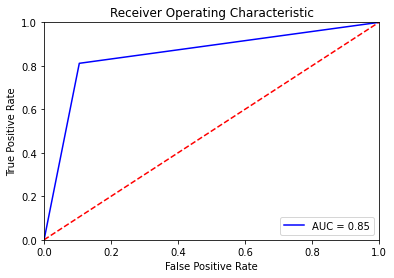

None
----------------------------------------------------------------------------------------------------
Classification report before dropping the column ['On-board service', 'Seat comfort', 'Inflight entertainment', 'Flight Distance']
                         precision    recall  f1-score   support

neutral or dissatisfied       0.94      0.95      0.94     11776
              satisfied       0.93      0.92      0.93      9005

               accuracy                           0.94     20781
              macro avg       0.94      0.93      0.93     20781
           weighted avg       0.94      0.94      0.94     20781

Classification report after dropping the column ['On-board service', 'Seat comfort', 'Inflight entertainment', 'Flight Distance']
Classification report of Optimized Support Vector Classifier: 
                          precision    recall  f1-score   support

neutral or dissatisfied       0.93      0.95      0.94     11776
              satisfied       0.93      0.91 

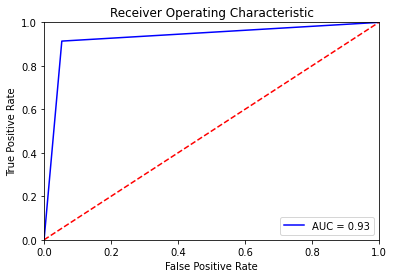

None
----------------------------------------------------------------------------------------------------


In [65]:
col2Drop=['On-board service','Seat comfort', 'Inflight entertainment', 'Flight Distance']

X_temp = X_new.drop(col2Drop, axis = 1)
x_new = X_temp
y= data["satisfaction"]
x_train2, x_test2, y_train, y_test = train_test_split(x_new,y, stratify=y, test_size = 0.2, random_state =101)
#Scale the data
    
scaler2 = MinMaxScaler()
x_train2 = scaler2.fit_transform(x_train2)
x_test2 = scaler2.transform(x_test2)
print(f"Classification report before dropping the column {col2Drop}")
print(olr_class_report)
print(f"Classification report after dropping the column {col2Drop}")
print(optimized_lr(x_train2, y_train, x_test2, y_test))
print("-"*100)

print(f"Classification report before dropping the column {col2Drop}")
print(odt_class_report)
print(f"Classification report after dropping the column {col2Drop}")
print(optimized_dt(x_train2, y_train, x_test2, y_test))
print("-"*100)

print(f"Classification report before dropping the column {col2Drop}")
print(orf_class_report)
print(f"Classification report after dropping the column {col2Drop}")
print(optimized_rfc(x_train2, y_train, x_test2, y_test))
print("-"*100)

print(f"Classification report before dropping the column {col2Drop}")
print(sgd_class_report)
print(f"Classification report after dropping the column {col2Drop}")
print(optimized_sgd(x_train2, y_train, x_test2, y_test))
print("-"*100)

print(f"Classification report before dropping the column {col2Drop}")
print(osvm_class_report)
print(f"Classification report after dropping the column {col2Drop}")
print(optimized_svm(x_train2, y_train, x_test2, y_test))
print("-"*100)